In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

In [3]:
## Note that textfile containing these data uses a tab delimiter to separate the label and message
sms = pd.read_csv("sms_spam.txt", sep='\t', names=['Label','Message'])

## Train-test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(sms, test_size=0.2, random_state=8)

## Split outcome from predictors
train_y = (train['Label'] == 'spam').astype(int)
train_msg = train['Message']

In [4]:
## Function to measure numbers
def get_num(text):
    return sum(map(str.isdigit, text))/len(text)

## Define "first_word" function
def first_word(text):
    return text.split(sep=' ')[0].lower().replace('!','')

## Recreate train_X using the new feature
d = {'prop_num': train_msg.apply(get_num),
    'first_word': train_msg.apply(first_word)}
train_X = pd.DataFrame(d)

## Apply OHE to the 'first' column and keep only "urgent" and "free"
from pandas import get_dummies
train_X_ohe = get_dummies(train_X, columns=['first_word'])
train_X = train_X_ohe[['prop_num','first_word_urgent','first_word_free']]

In [7]:
train_X

,prop_num,first_word_urgent,first_word_free
3922,0.017857,0,0
2559,0.000000,0,0
2672,0.000000,0,0
4282,0.006579,0,0
987,0.000000,0,0
...,...,...,...
2181,0.000000,0,0
2409,0.000000,0,0
2033,0.000000,0,0
1364,0.000000,0,0


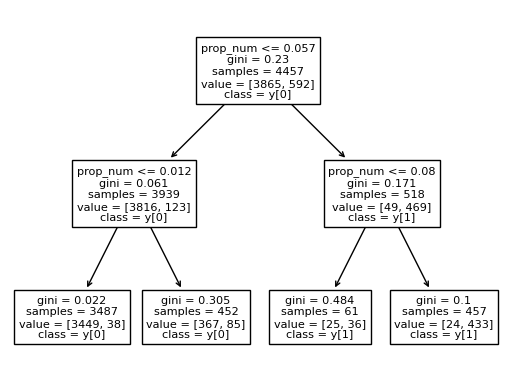

In [8]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier(max_depth = 2).fit(train_X, train_y)
## Plot
from sklearn.tree import plot_tree
plot_tree(my_tree, feature_names=train_X.columns, class_names=True)
plt.show()

#question 1
#Part A) Notice that the final prediction for the two terminal nodes on the left side of the tree is "not spam", and the prediction for the rightmost two nodes is "spam". Does this mean that the second round of splits are inconsequential? Briefly explain.

we found the second round of splits to be inconsequential because it does not help in further dividing the classes; 
the second round of splits is simply creating the subclasses for each classes. 

#question 1
#Part B)Verify that the gini impurity before any splits have occured is 0.2303647 (which was rounded in the plotted tree) by performing the calculation yourself using the value information in the tree.

In [13]:
gini_impurity = (3865/4457)*(1-(3865/4457)) + (592/4457)*(1-(592/4457))
print(f'gini impurity is {gini_impurity}')

gini impurity is 0.23036470098514214


In [14]:
#question 1
#Part c)
## Code for Part C
pred_probs = my_tree.predict_proba(train_X)
np.unique(pred_probs, axis=0)


array([[0.05251641, 0.94748359],
       [0.40983607, 0.59016393],
       [0.8119469 , 0.1880531 ],
       [0.98910238, 0.01089762]])

the values of four unique rows correspond to the probability of the spam/non-spam for the four classes that we have as the result of our three splits. 

In [17]:
pred_probs

array([[0.8119469 , 0.1880531 ],
       [0.98910238, 0.01089762],
       [0.98910238, 0.01089762],
       ...,
       [0.98910238, 0.01089762],
       [0.98910238, 0.01089762],
       [0.98910238, 0.01089762]])